# **ECSE415_A5**

# **Student Name: Zhiheng Zhou**

# **Student ID: 260955157**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import segmentation, color
import cv2
import numpy as np

%matplotlib inline

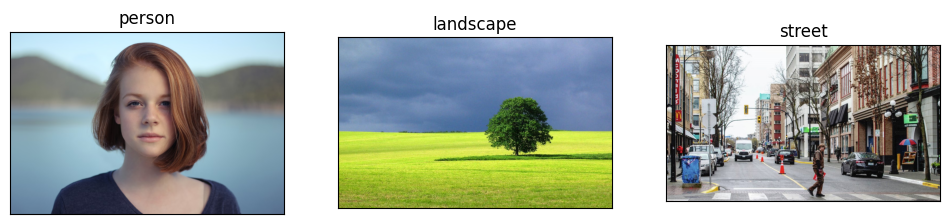

In [ ]:
# References:
# ECSE415 Tutorial 9: Tutorial: Clustering and Segmentation

path='/content/drive/MyDrive/ECSE415/Colab_Notebooks_A5/'

# Read in the image
person = mpimg.imread(path + 'Person.png')
landscape = mpimg.imread(path + 'landscape.png')
street = mpimg.imread(path + 'street.png')

plt.figure(figsize=(12,16))
plt.subplot(131), plt.imshow(person)
plt.title("person"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(landscape)
plt.title("landscape"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(street)
plt.title("street"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Grayscale
person_gray = cv2.cvtColor(person, cv2.COLOR_RGB2GRAY)
landscape_gray = cv2.cvtColor(landscape, cv2.COLOR_RGB2GRAY)
street_gray = cv2.cvtColor(street, cv2.COLOR_RGB2GRAY)

In [ ]:
# Create Haar filter
Haar1 = np.full((12,12),1)
Haar2 = np.full((12,12), -1)

Haar_white_black = np.concatenate([Haar1, Haar2]) # 24x12 Haar Filter
Haar_black_white = np.concatenate([Haar2, Haar1])

Haar = np.append(Haar_black_white,Haar_white_black, axis = 1) # 24x24 Haar Filter

print(Haar_white_black)
print(Haar)

[[ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  

# **Haar feature of Person.png and landscape.png**

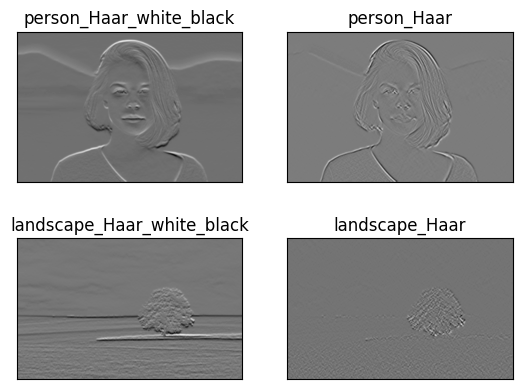

In [ ]:
# Apply 24x12 Harr filter to Person.png
person_Haar_white_black = cv2.filter2D(person_gray, -1, Haar_white_black)

# Apply 24x24 Harr filter to Person.png
person_Haar = cv2.filter2D(person_gray, -1, Haar)

# Display
plt.subplot(221), plt.imshow(person_Haar_white_black, cmap='gray')
plt.title("person_Haar_white_black"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(person_Haar, cmap='gray')
plt.title("person_Haar"), plt.xticks([]), plt.yticks([])

# Apply 24x12 Harr filter to landscape.png
landscape_Haar_white_black = cv2.filter2D(landscape_gray, -1, Haar_white_black)

# Apply 24x24 Harr filter to landscape.png
landscape_Haar = cv2.filter2D(landscape_gray, -1, Haar)

# Display
plt.subplot(223), plt.imshow(landscape_Haar_white_black, cmap='gray')
plt.title("landscape_Haar_white_black"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(landscape_Haar, cmap='gray')
plt.title("landscape_Haar"), plt.xticks([]), plt.yticks([])

plt.show()

# **Implement the K-means clustering**

shape of image after flattening: (2856600, 1)
shape of image after flattening: (2304000, 1)
loss value: 38768623.73134693
loss value: 60163901.54539496


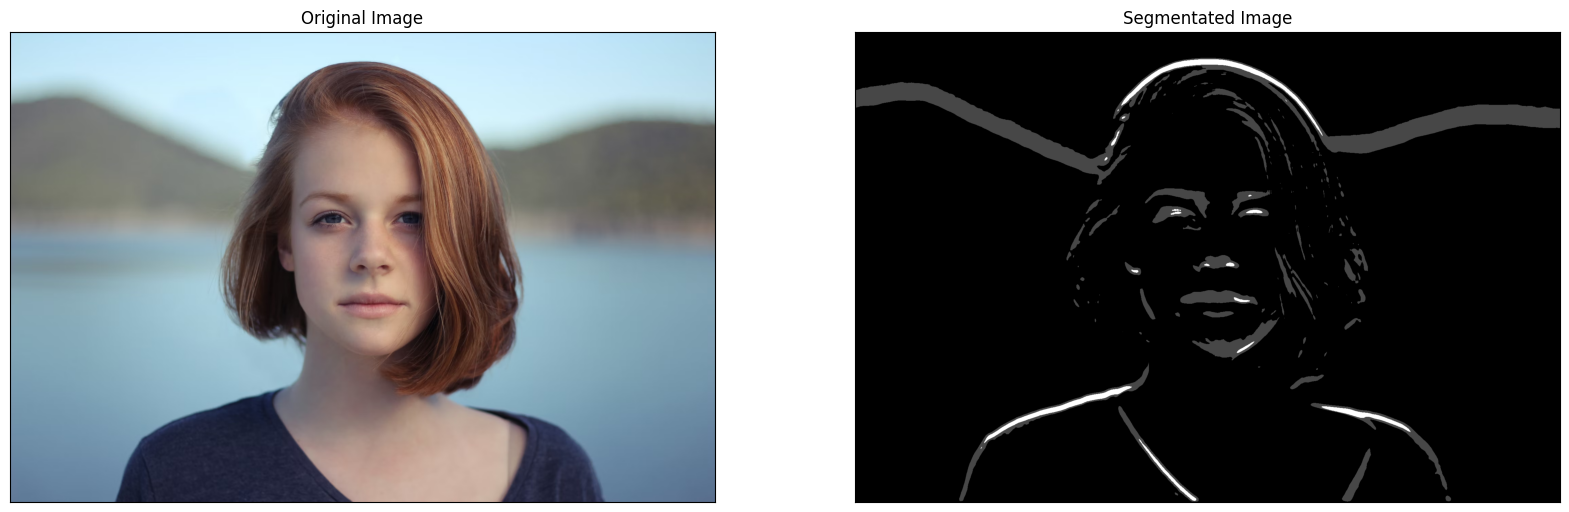

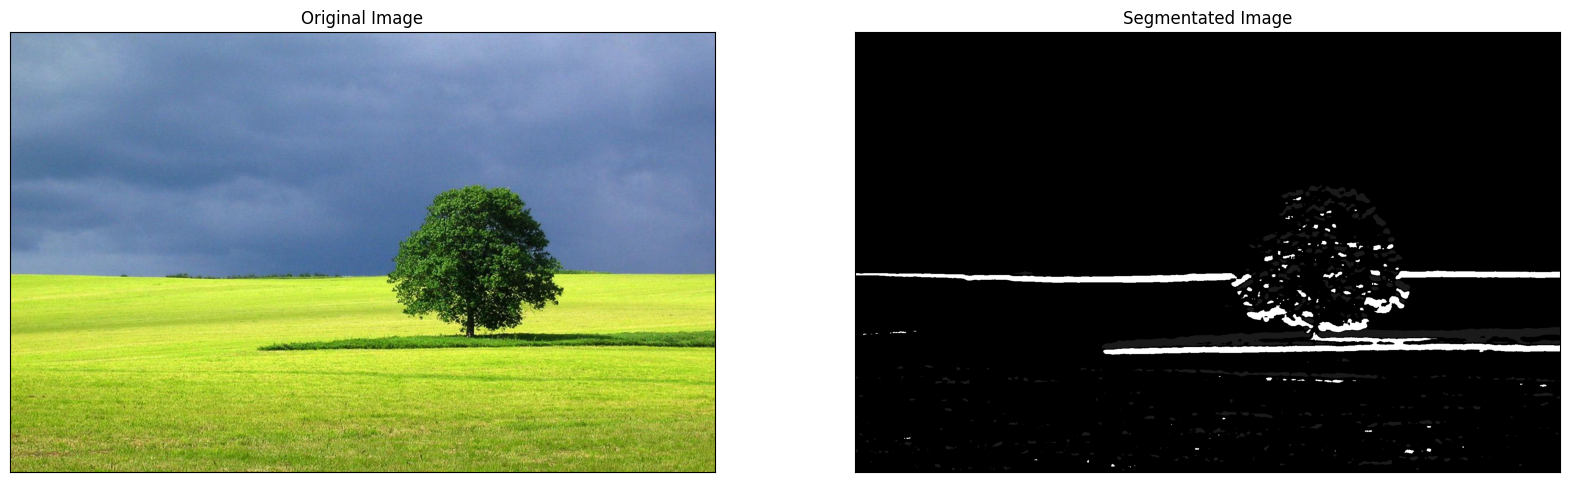

In [ ]:
# 24x12 Haar Fiter

Z = person_Haar_white_black.reshape((-1,1))
L = landscape_Haar_white_black.reshape((-1,1))
# convert to np.float32
Z = np.float32(Z)
L = np.float32(L)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
retL,labelL,centerL=cv2.kmeans(L,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(f"shape of image after flattening: {Z.shape}")
print(f"shape of image after flattening: {L.shape}")

print(f"loss value: {ret}")
print(f"loss value: {retL}")
# Now convert back into uint8, and make original image
center = np.uint8(center)
out = center[label.flatten()]
out = out.reshape((person_Haar_white_black.shape))

centerL = np.uint8(centerL)
outL = centerL[labelL.flatten()]
outL = outL.reshape((landscape_Haar_white_black.shape))

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(person)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(out, cmap='gray')
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(223)
plt.imshow(landscape)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(224)
plt.imshow(outL, cmap='gray')
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

shape of image after flattening: (2856600, 1)
shape of image after flattening: (2304000, 1)
loss value: 15034887.58499681
loss value: 18961245.564797994


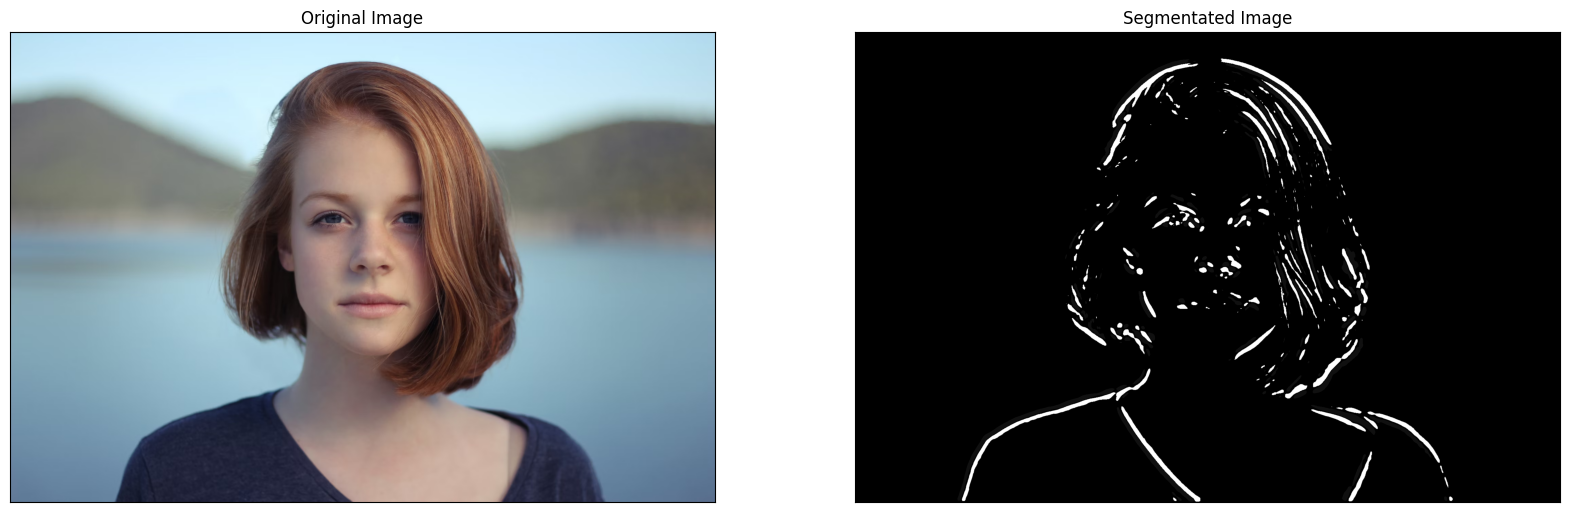

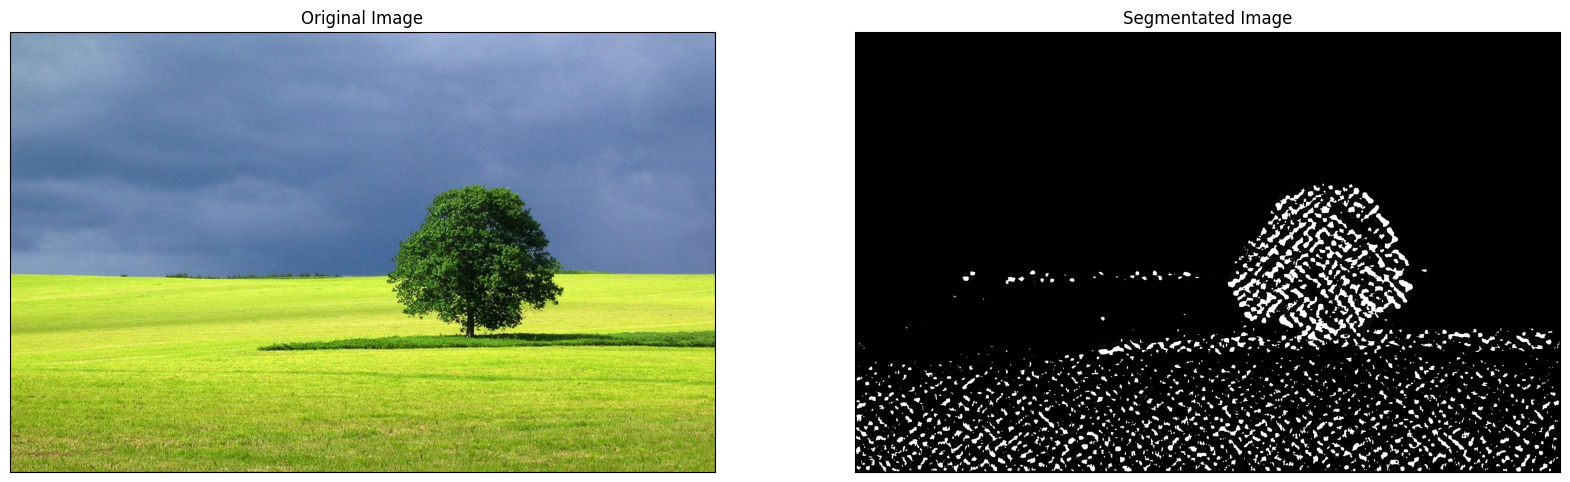

In [ ]:
# 24x24 Haar Fiter

Z2 = person_Haar.reshape((-1,1))
L2= landscape_Haar.reshape((-1,1))
# convert to np.float32
Z2 = np.float32(Z2)
L2 = np.float32(L2)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z2,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
retL,labelL,centerL=cv2.kmeans(L2,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(f"shape of image after flattening: {Z2.shape}")
print(f"shape of image after flattening: {L2.shape}")

print(f"loss value: {ret}")
print(f"loss value: {retL}")
# Now convert back into uint8, and make original image
center = np.uint8(center)
out = center[label.flatten()]
out = out.reshape((person_Haar.shape))

centerL = np.uint8(centerL)
outL = centerL[labelL.flatten()]
outL = outL.reshape((landscape_Haar.shape))

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(person)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(out, cmap='gray')
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(223)
plt.imshow(landscape)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(224)
plt.imshow(outL, cmap='gray')
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

# **Mean-shift segmentation**

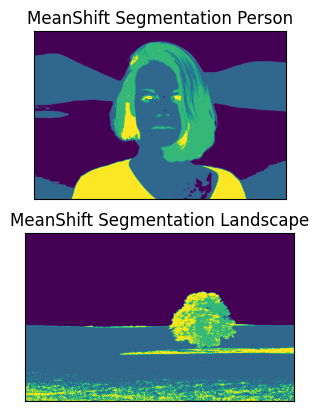

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2lab
from sklearn.cluster import MeanShift, estimate_bandwidth

# Load and transform the image to the LAB color space
image = io.imread(path+'Person.png')
image_lab = rgb2lab(image)

# Reshape the image to be a two-column array of LAB color values
flat_image_lab = image_lab.reshape((-1, 3))

# Estimate bandwidth for MeanShift algorithm
bandwidth = estimate_bandwidth(flat_image_lab, quantile=0.2, n_samples=500)

# Perform MeanShift Clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image_lab)
labels = ms.labels_

# Reshape the result to the original image shape
segmented_image = labels.reshape(image_lab.shape[:2])

# Plot the segmented image
plt.subplot(211)
plt.imshow(segmented_image)
plt.title('MeanShift Segmentation Person'), plt.xticks([]), plt.yticks([])


# Load and transform the image to the LAB color space
imageL = io.imread(path+'landscape.png')
image_labL = rgb2lab(imageL)

# Reshape the image to be a two-column array of LAB color values
flat_image_labL = image_labL.reshape((-1, 3))

# Estimate bandwidth for MeanShift algorithm
bandwidthL = estimate_bandwidth(flat_image_labL, quantile=0.2, n_samples=500)

# Perform MeanShift Clustering
msL = MeanShift(bandwidth=bandwidthL, bin_seeding=True)
ms.fit(flat_image_labL)
labelsL = ms.labels_

# Reshape the result to the original image shape
segmented_imageL = labelsL.reshape(image_labL.shape[:2])

# Plot the segmented image
plt.subplot(212)
plt.imshow(segmented_imageL)
plt.title('MeanShift Segmentation Landscape'), plt.xticks([]), plt.yticks([])
plt.show()


1. K-means clustering:


*   Benifits
    
    a). Easy to implement.
    
    b). High Computation Efficiency, especially when number of data points is large.

    c). Scalable to higher dimensions, can handle large datasets. Useful for image analysis where pixels may have multiple features.

*   Limits

    a). Selecting an inappropriate value for k will result in poor segmentation results.

    b). Sensitive to initialization. Different initializations may result in different clustering result.

    c). May not be suitable for clusters with complex shapes.

2. K-means clustering:
*   Benifits
    
    a). Adaptable to shape or size of clusters, suitable for clusters with complex structures.
    
    b). Automatically determinates the number of clusters based on the data distribution.

    c). Less sensitive to initialization.

*   Limits

    a). Low computation efficiency, especially when datasets are large.

    b). Selecting an inappropriate bandwidth can lead to errors. It may require a lot of trials to select an apporiate bandwidth.

    c). May not be suitable for High-Dimensional Data.


# **Part 2 Neural Network Implementation for Image Segmentation**

Reference: https://colab.research.google.com/github/tensorflow/tpu/blob/master/models/official/mask_rcnn/mask_rcnn_demo.ipynb#scrollTo=_Q5r1zob93OF

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Download the source code of the Mask R-CNN model.
!git clone https://github.com/tensorflow/tpu/

Cloning into 'tpu'...
remote: Enumerating objects: 11630, done.
remote: Counting objects: 100% (1832/1832), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 11630 (delta 1059), reused 1619 (delta 964), pack-reused 9798
Receiving objects: 100% (11630/11630), 47.06 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (8097/8097), done.


In [ ]:
from IPython import display
from PIL import Image
import numpy as np
# %tensorflow_version 1.x
# import tensorflow as tf
import sys
sys.path.insert(0, 'tpu/models/official')
sys.path.insert(0, 'tpu/models/official/mask_rcnn')
import coco_metric
from mask_rcnn.object_detection import visualization_utils

# **Load the COCO index mapping**

In [ ]:
ID_MAPPING = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    13: 'stop sign',
    14: 'parking meter',
    15: 'bench',
    16: 'bird',
    17: 'cat',
    18: 'dog',
    19: 'horse',
    20: 'sheep',
    21: 'cow',
    22: 'elephant',
    23: 'bear',
    24: 'zebra',
    25: 'giraffe',
    27: 'backpack',
    28: 'umbrella',
    31: 'handbag',
    32: 'tie',
    33: 'suitcase',
    34: 'frisbee',
    35: 'skis',
    36: 'snowboard',
    37: 'sports ball',
    38: 'kite',
    39: 'baseball bat',
    40: 'baseball glove',
    41: 'skateboard',
    42: 'surfboard',
    43: 'tennis racket',
    44: 'bottle',
    46: 'wine glass',
    47: 'cup',
    48: 'fork',
    49: 'knife',
    50: 'spoon',
    51: 'bowl',
    52: 'banana',
    53: 'apple',
    54: 'sandwich',
    55: 'orange',
    56: 'broccoli',
    57: 'carrot',
    58: 'hot dog',
    59: 'pizza',
    60: 'donut',
    61: 'cake',
    62: 'chair',
    63: 'couch',
    64: 'potted plant',
    65: 'bed',
    67: 'dining table',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remote',
    76: 'keyboard',
    77: 'cell phone',
    78: 'microwave',
    79: 'oven',
    80: 'toaster',
    81: 'sink',
    82: 'refrigerator',
    84: 'book',
    85: 'clock',
    86: 'vase',
    87: 'scissors',
    88: 'teddy bear',
    89: 'hair drier',
    90: 'toothbrush',
}
category_index = {k: {'id': k, 'name': ID_MAPPING[k]} for k in ID_MAPPING}

# **Street**

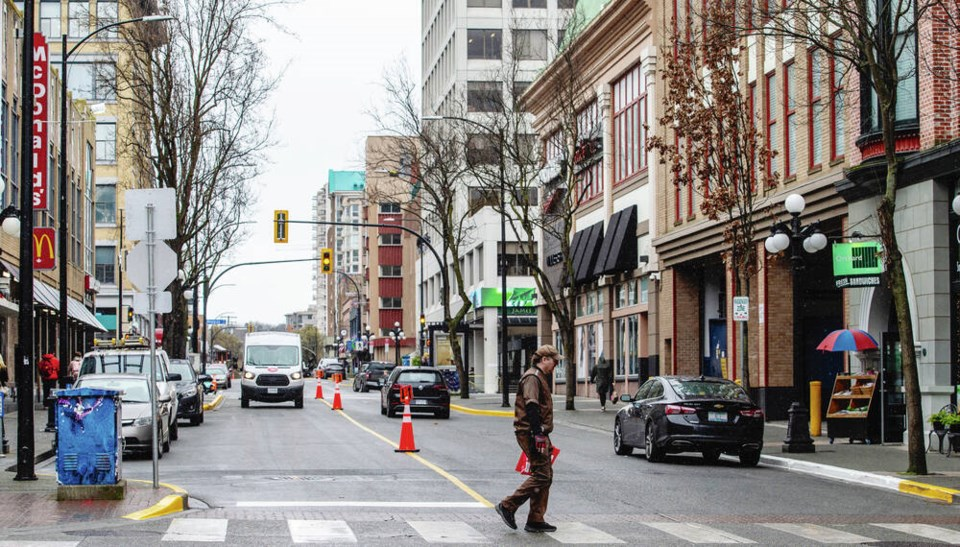

In [ ]:
path='/content/drive/MyDrive/ECSE415/Colab_Notebooks_A5/'
image_path = path + 'street.png'

with open(image_path, 'rb') as f:
  np_image_string = np.array([f.read()])

image = Image.open(image_path)
width, height = image.size
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image(image_path, width=1024))

**Implement the pre-trained Mask R-CNN model**

In [ ]:
use_tpu = True #@param {type:"boolean"}
if use_tpu:
  import os
  import pprint

  assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
  TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print('TPU address is', TPU_ADDRESS)

  session = tf.Session(TPU_ADDRESS, graph=tf.Graph())
  print('TPU devices:')
  pprint.pprint(session.list_devices())
else:
  session = tf.Session(graph=tf.Graph())

TPU address is grpc://10.0.158.234:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 6073691361090126259),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, -1695240918100929706),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6861931112550939128),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, -5134433844543667425),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, -646278184912635410),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, -2370938532234774288),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 5155927129841075564),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, -9191103134771836298),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, -475591

In [ ]:
saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850' #@param {type:"string"}
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

Instructions for updating:
Use `tf.saved_model.load` instead.


In [ ]:
num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
    ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
    feed_dict={'Placeholder:0': np_image_string})

num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)

**Display the result**

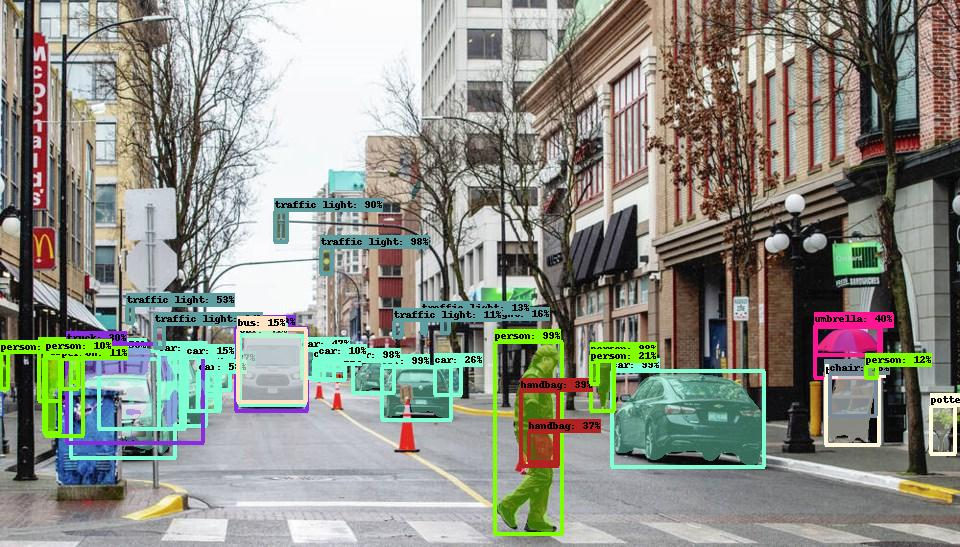

In [ ]:
max_boxes_to_draw = 50   #@param {type:"integer"}
min_score_thresh = 0.1    #@param {type:"slider", min:0, max:1, step:0.01}

image_with_detections = visualization_utils.visualize_boxes_and_labels_on_image_array(
    np_image,
    detection_boxes,
    detection_classes,
    detection_scores,
    category_index,
    instance_masks=segmentations,
    use_normalized_coordinates=False,
    max_boxes_to_draw=max_boxes_to_draw,
    min_score_thresh=min_score_thresh)
output_image_path = 'test_results.jpg'
Image.fromarray(image_with_detections.astype(np.uint8)).save(output_image_path)
display.display(display.Image(output_image_path, width=1024))

# **Montreal Street Scene**

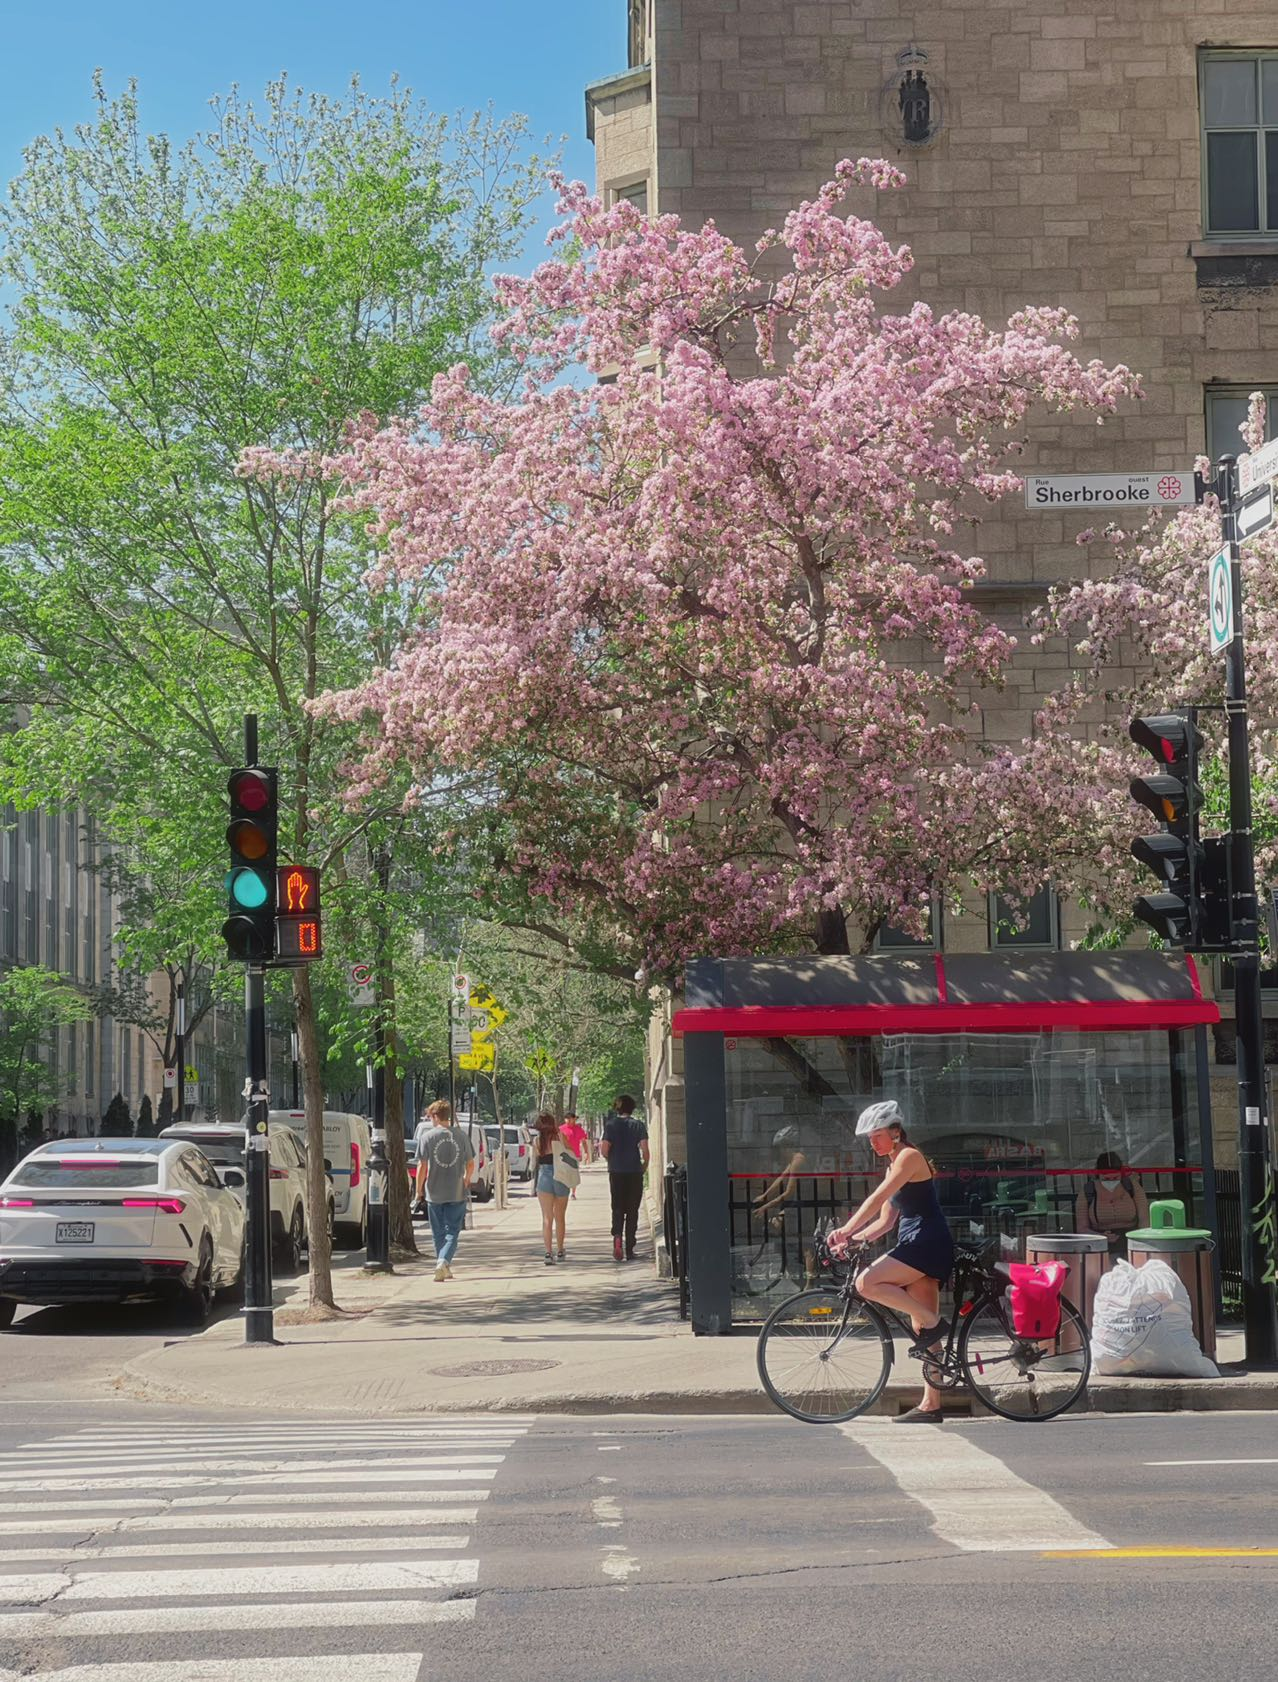

In [ ]:
image2_path = path + 'MTL2.jpg'
with open(image2_path, 'rb') as f:
  np_image_string = np.array([f.read()])

image = Image.open(image2_path)
width, height = image.size
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image(image2_path, width=1024))

**Implement the pre-trained Mask R-CNN model**

In [ ]:
use_tpu = True #@param {type:"boolean"}
if use_tpu:
  import os
  import pprint

  assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
  TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print('TPU address is', TPU_ADDRESS)

  session = tf.Session(TPU_ADDRESS, graph=tf.Graph())
  print('TPU devices:')
  pprint.pprint(session.list_devices())
else:
  session = tf.Session(graph=tf.Graph())

TPU address is grpc://10.0.158.234:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 6073691361090126259),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, -1695240918100929706),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6861931112550939128),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, -5134433844543667425),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, -646278184912635410),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, -2370938532234774288),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 5155927129841075564),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, -9191103134771836298),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, -475591

In [ ]:
saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850' #@param {type:"string"}
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

In [ ]:
num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
    ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
    feed_dict={'Placeholder:0': np_image_string})

num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)

**Display the result**

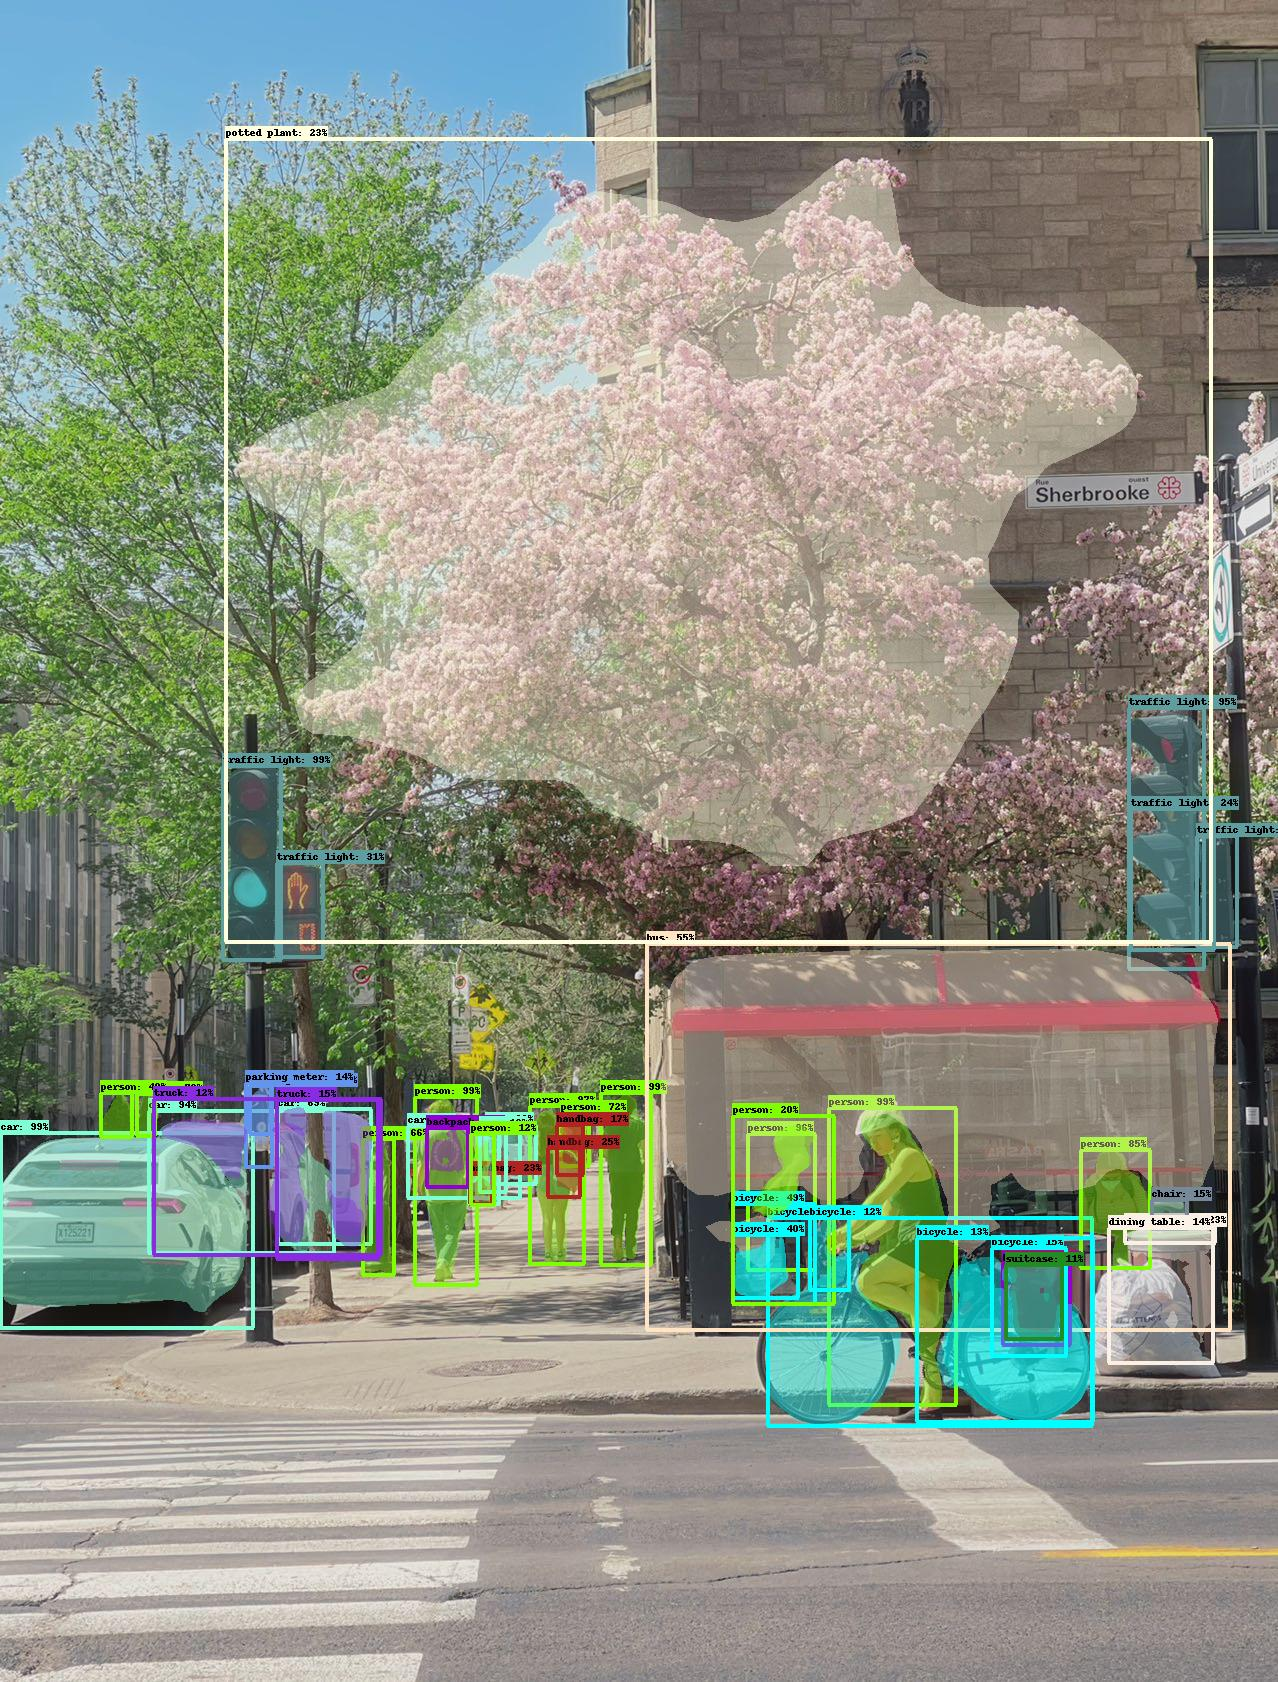

In [ ]:
max_boxes_to_draw = 50   #@param {type:"integer"}
min_score_thresh = 0.1    #@param {type:"slider", min:0, max:1, step:0.01}

image_with_detections = visualization_utils.visualize_boxes_and_labels_on_image_array(
    np_image,
    detection_boxes,
    detection_classes,
    detection_scores,
    category_index,
    instance_masks=segmentations,
    use_normalized_coordinates=False,
    max_boxes_to_draw=max_boxes_to_draw,
    min_score_thresh=min_score_thresh)
output_image_path = 'test_results2.jpg'
Image.fromarray(image_with_detections.astype(np.uint8)).save(output_image_path)
display.display(display.Image(output_image_path, width=1024))

1. Evaluate performace of pre-trained Mask R-CNN:

  It can correctly recognize and classify most of the objects. However, when certain objects are partially covered, it will give inacurrate results. Moreover, from the second test result, we could tell that the R-CNN model cannot tell the difference between an object's reflection and a real-object.

2. Steps Taken by Mask R-CNN:

  *Reference:*

  *https://www.mathworks.com/help/vision/ug/getting-started-with-mask-r-cnn-for-instance-segmentation.html*
  
  *https://github.com/matterport/Mask_RCNN*

   a). Anchor sorting and filtering:

      * Predicts object proposal bounding boxes based on anchor boxes

   b).  Bounding Box Refinement:

      * R-CNN detector refines these proposals, classifies them, and computes the pixel-level segmentation for these proposals.